In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr

# **Extract zip file**

In [ ]:
from zipfile import ZipFile
name= "data.zip"

with ZipFile (name,"r") as zip :
  zip.extractall()
  print ("DONE")

DONE


# **Remove dodgy images**

In [ ]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/football/stock-photo-soccer-ball-football-ball-123778060.jpg
Image not in ext list data/basketball/basketball12.gif
Image not in ext list data/basketball/padre_basketball.gif


# **Load Data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Found 370 files belonging to 2 classes.


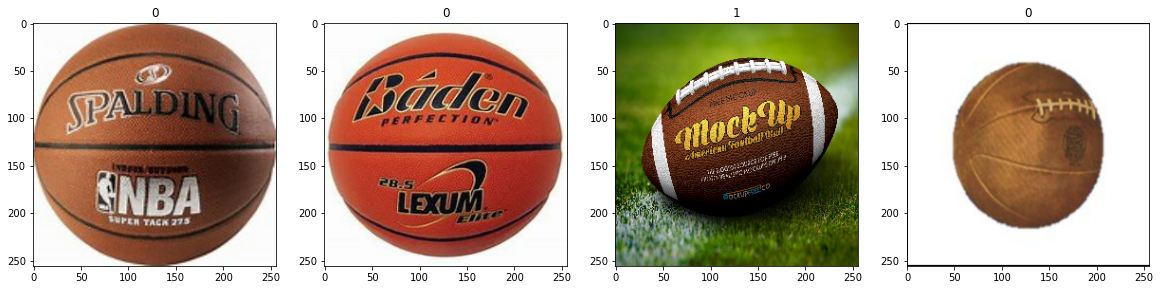

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#class 1 (football)
#class 0 (basketball)

# **Scaling**

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.5137255 , 0.47843137, 0.54509807],
          [0.54197305, 0.51374084, 0.5839384 ],
          [0.48295802, 0.4751302 , 0.54571843],
          ...,
          [0.39341298, 0.02087929, 0.01303615],
          [0.46546414, 0.07018229, 0.06233915],
          [0.5254902 , 0.10196079, 0.09411765]],
 
         [[0.5137255 , 0.48867953, 0.54509807],
          [0.5388972 , 0.5209132 , 0.5808626 ],
          [0.5080313 , 0.5076027 , 0.5764896 ],
          ...,
          [0.4156507 , 0.05279804, 0.04153885],
          [0.4408846 , 0.05311536, 0.04253672],
          [0.46400124, 0.05413603, 0.04970895]],
 
         [[0.39980087, 0.38858762, 0.43425244],
          [0.5243218 , 0.52017045, 0.5693662 ],
          [0.50609475, 0.52164525, 0.5784753 ],
          ...,
          [0.42972416, 0.07599571, 0.06064079],
          [0.43848607, 0.06753052, 0.05038898],
          [0.43950674, 0.05013787, 0.04005821]],
 
         ...,
 
         [[0.35883886, 0.339231  , 0.36276042],
          [0.34497

# **Split Data**

In [ ]:
len(data)

12

In [ ]:
train_size = int(len(data)*(10/21))
val_size = int(len(data)*(6/21))
test_size = int(len(data)*(5/21))
train_size

5

In [ ]:
test_size

2

In [ ]:
val_size

3

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# **Train**

In [ ]:
save='saved'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=save)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 13s 746ms/step - loss: 3.9662 - accuracy: 0.4938 - val_loss: 1.5880 - val_accuracy: 0.5417
Epoch 2/20
5/5 [==============================] - 5s 777ms/step - loss: 1.0966 - accuracy: 0.5188 - val_loss: 0.6760 - val_accuracy: 0.5625
Epoch 3/20
5/5 [==============================] - 5s 778ms/step - loss: 0.6736 - accuracy: 0.6313 - val_loss: 0.6391 - val_accuracy: 0.7083
Epoch 4/20
5/5 [==============================] - 5s 703ms/step - loss: 0.6370 - accuracy: 0.6812 - val_loss: 0.5618 - val_accuracy: 0.7917
Epoch 5/20
5/5 [==============================] - 5s 694ms/step - loss: 0.5442 - accuracy: 0.7625 - val_loss: 0.4740 - val_accuracy: 0.8125
Epoch 6/20
5/5 [==============================] - 5s 693ms/step - loss: 0.4798 - accuracy: 0.7812 - val_loss: 0.3843 - val_accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 5s 769ms/step - loss: 0.4298 - accuracy: 0.7812 - val_loss: 0.4600 - val_accuracy: 0.8125
Epoch 8/20
5/5 [===

# **Plot Performance**

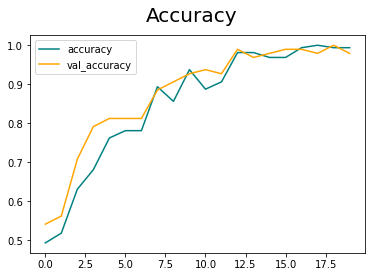

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# **Calculationns**

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 28ms/step


In [ ]:
print(f'''precision: {pre.result()}
Recall: {re.result()}
Accuracy: {acc.result()}''')

precision: 1.0
Recall: 1.0
Accuracy: 1.0


# **Test**

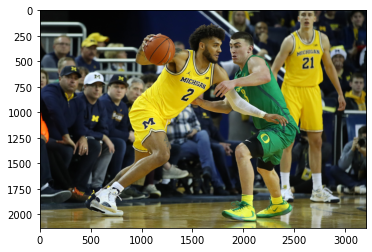

In [ ]:
img = cv2.imread('/content/data/basketball/2540-49795-original.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

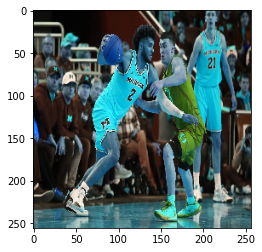

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 17ms/step


array([[0.00166594]], dtype=float32)

In [ ]:
if yhat >0.55: 
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Basketball')

Predicted class is Basketball


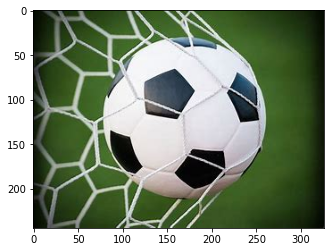

In [ ]:
img1 = cv2.imread('/content/data/football/image8.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

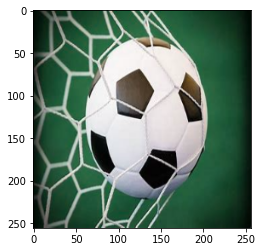

In [ ]:
rescale = tf.image.resize(img1, (256,256))
plt.imshow(rescale.numpy().astype(int))
plt.show()

In [ ]:
y = model.predict(np.expand_dims(rescale/255, 0))
y


1/1 [==============================] - 0s 16ms/step


array([[0.9959079]], dtype=float32)

In [ ]:
if y >0.55: 
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Basketball')

Predicted class is Football


# **Save the Model**

In [ ]:

from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')